## TF-IDF Baseline Model

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re


data = pd.read_csv('Company_Dataset/jobs_details_extracted.csv')
data.head(3)

,Company,job_name,job_link,ML Labeled Function,city,country,Function,employment_type,remote,seniority level,Job Status,Date Reviewed,data analyst,company_Link,job_location,job_details,job_id,posting_error,description
0,Spectrum,Advertising Account Executive- New Business,https://sjobs.brassring.com/TGnewUI/Search/hom...,Sales,Bay City,United States,Full-time,No,Mid-Senior Level,to be reviewed,NaN,NaN,NaN,<span><span>Tenacious go-getter. Inquisitive p...,11a21cd7-86c2-48a4-96b9-83fc59e428c1,NaN,https://www.smartrecruiters.com/Humanity/74399...,NaN,Tenacious go-getter. Inquisitive problem solve...
1,Spectrum,"Editor, Media Ingest - Spectrum News Raleigh",https://sjobs.brassring.com/TGnewUI/Search/hom...,Writing/Editing,Raleigh,United States,Full-time,No,Mid-Senior Level,to be reviewed,NaN,NaN,NaN,<span><span><span><b><span><span><span><span>S...,8e3143f9-e449-49fa-b2b7-a8fd30234c82,NaN,https://www.smartrecruiters.com/Humanity/74399...,NaN,"Spectrum Networks is looking for;enthusiastic,..."
2,Spectrum,Production Specialist I - Spectrum News 13 Orl...,https://sjobs.brassring.com/TGnewUI/Search/hom...,Other,Orlando,United States,Full-time,No,Mid-Senior Level,to be reviewed,NaN,NaN,NaN,<span><span><span><b><span><span><span><span>S...,fc34ab5f-ee2d-4145-81c4-126f52b1df35,NaN,https://www.smartrecruiters.com/Humanity/74399...,NaN,"Spectrum Networks is looking for;enthusiastic,..."


In [17]:
data.columns

Index(['Company', 'job_name', 'job_link', 'ML Labeled Function', 'city',
       'country', 'Function', 'employment_type', 'remote', 'seniority level',
       'Job Status', 'Date Reviewed', 'data analyst', 'company_Link',
       'job_location', 'job_details', 'job_id', 'posting_error',
       'description'],
      dtype='object')

In [19]:
descriptions = data['description']
print(descriptions[0])

Tenacious go-getter. Inquisitive problem solver. Results-driven performer. Sound like you? Then you'll be well suited for a spot in advertising sales at Spectrum Reach. At Spectrum Reach, our team brings more than 22,000 clients world-class creative and innovative advertising solutions to get more impressions in front of their target audiences. We give our clients the best content, insights, products, and people to exceed their advertising needs across TV, apps, social, and other media platforms.BE PART OF THE CONNECTION As an Advertising Account Executive with Spectrum Reach, you will work with local, national, and agency partners to drive revenue across your region. You will also connect your clients to iconic local properties such as the Dodgers and Lakers. We will train you on our advanced advertising solutions allowing you to use your strong sales initiative to grow your client’s bottom line—and your career.; WHAT OUR ADVERTISING ACCOUNT EXECUTIVES ENJOY MOST ;;;;;;;;●; Selling in

In [22]:
def clean_docs(docs):
    stops = stopwords.words("english")
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

In [21]:
def remove_stops(text, stops):
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

In [23]:
cleaned_docs = clean_docs(descriptions)
cleaned_docs[0]

'Tenacious gogetter Inquisitive problem solver Resultsdriven performer Sound like you Then well suited spot advertising sales Spectrum Reach At Spectrum Reach team brings clients worldclass creative innovative advertising solutions get impressions front target audiences We give clients best content insights products people exceed advertising needs across TV apps social media platformsBE PART OF THE CONNECTION As Advertising Account Executive Spectrum Reach work local national agency partners drive revenue across region You also connect clients iconic local properties Dodgers Lakers We train advanced advertising solutions allowing use strong sales initiative grow client’s bottom line—and career WHAT OUR ADVERTISING ACCOUNT EXECUTIVES ENJOY MOST ● Selling innovative solutions traditional advertising platforms evolving interactive media● Growing cultivating book business● Building client relationships daily engagement helping solve evolving needs● Collaborating professionals value innovat

In [24]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (descriptions[0])
print (all_keywords[0])

Tenacious go-getter. Inquisitive problem solver. Results-driven performer. Sound like you? Then you'll be well suited for a spot in advertising sales at Spectrum Reach. At Spectrum Reach, our team brings more than 22,000 clients world-class creative and innovative advertising solutions to get more impressions in front of their target audiences. We give our clients the best content, insights, products, and people to exceed their advertising needs across TV, apps, social, and other media platforms.BE PART OF THE CONNECTION As an Advertising Account Executive with Spectrum Reach, you will work with local, national, and agency partners to drive revenue across your region. You will also connect your clients to iconic local properties such as the Dodgers and Lakers. We will train you on our advanced advertising solutions allowing you to use your strong sales initiative to grow your client’s bottom line—and your career.; WHAT OUR ADVERTISING ACCOUNT EXECUTIVES ENJOY MOST ;;;;;;;;●; Selling in

In [25]:
#K-means

true_k = 20

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open ("trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")


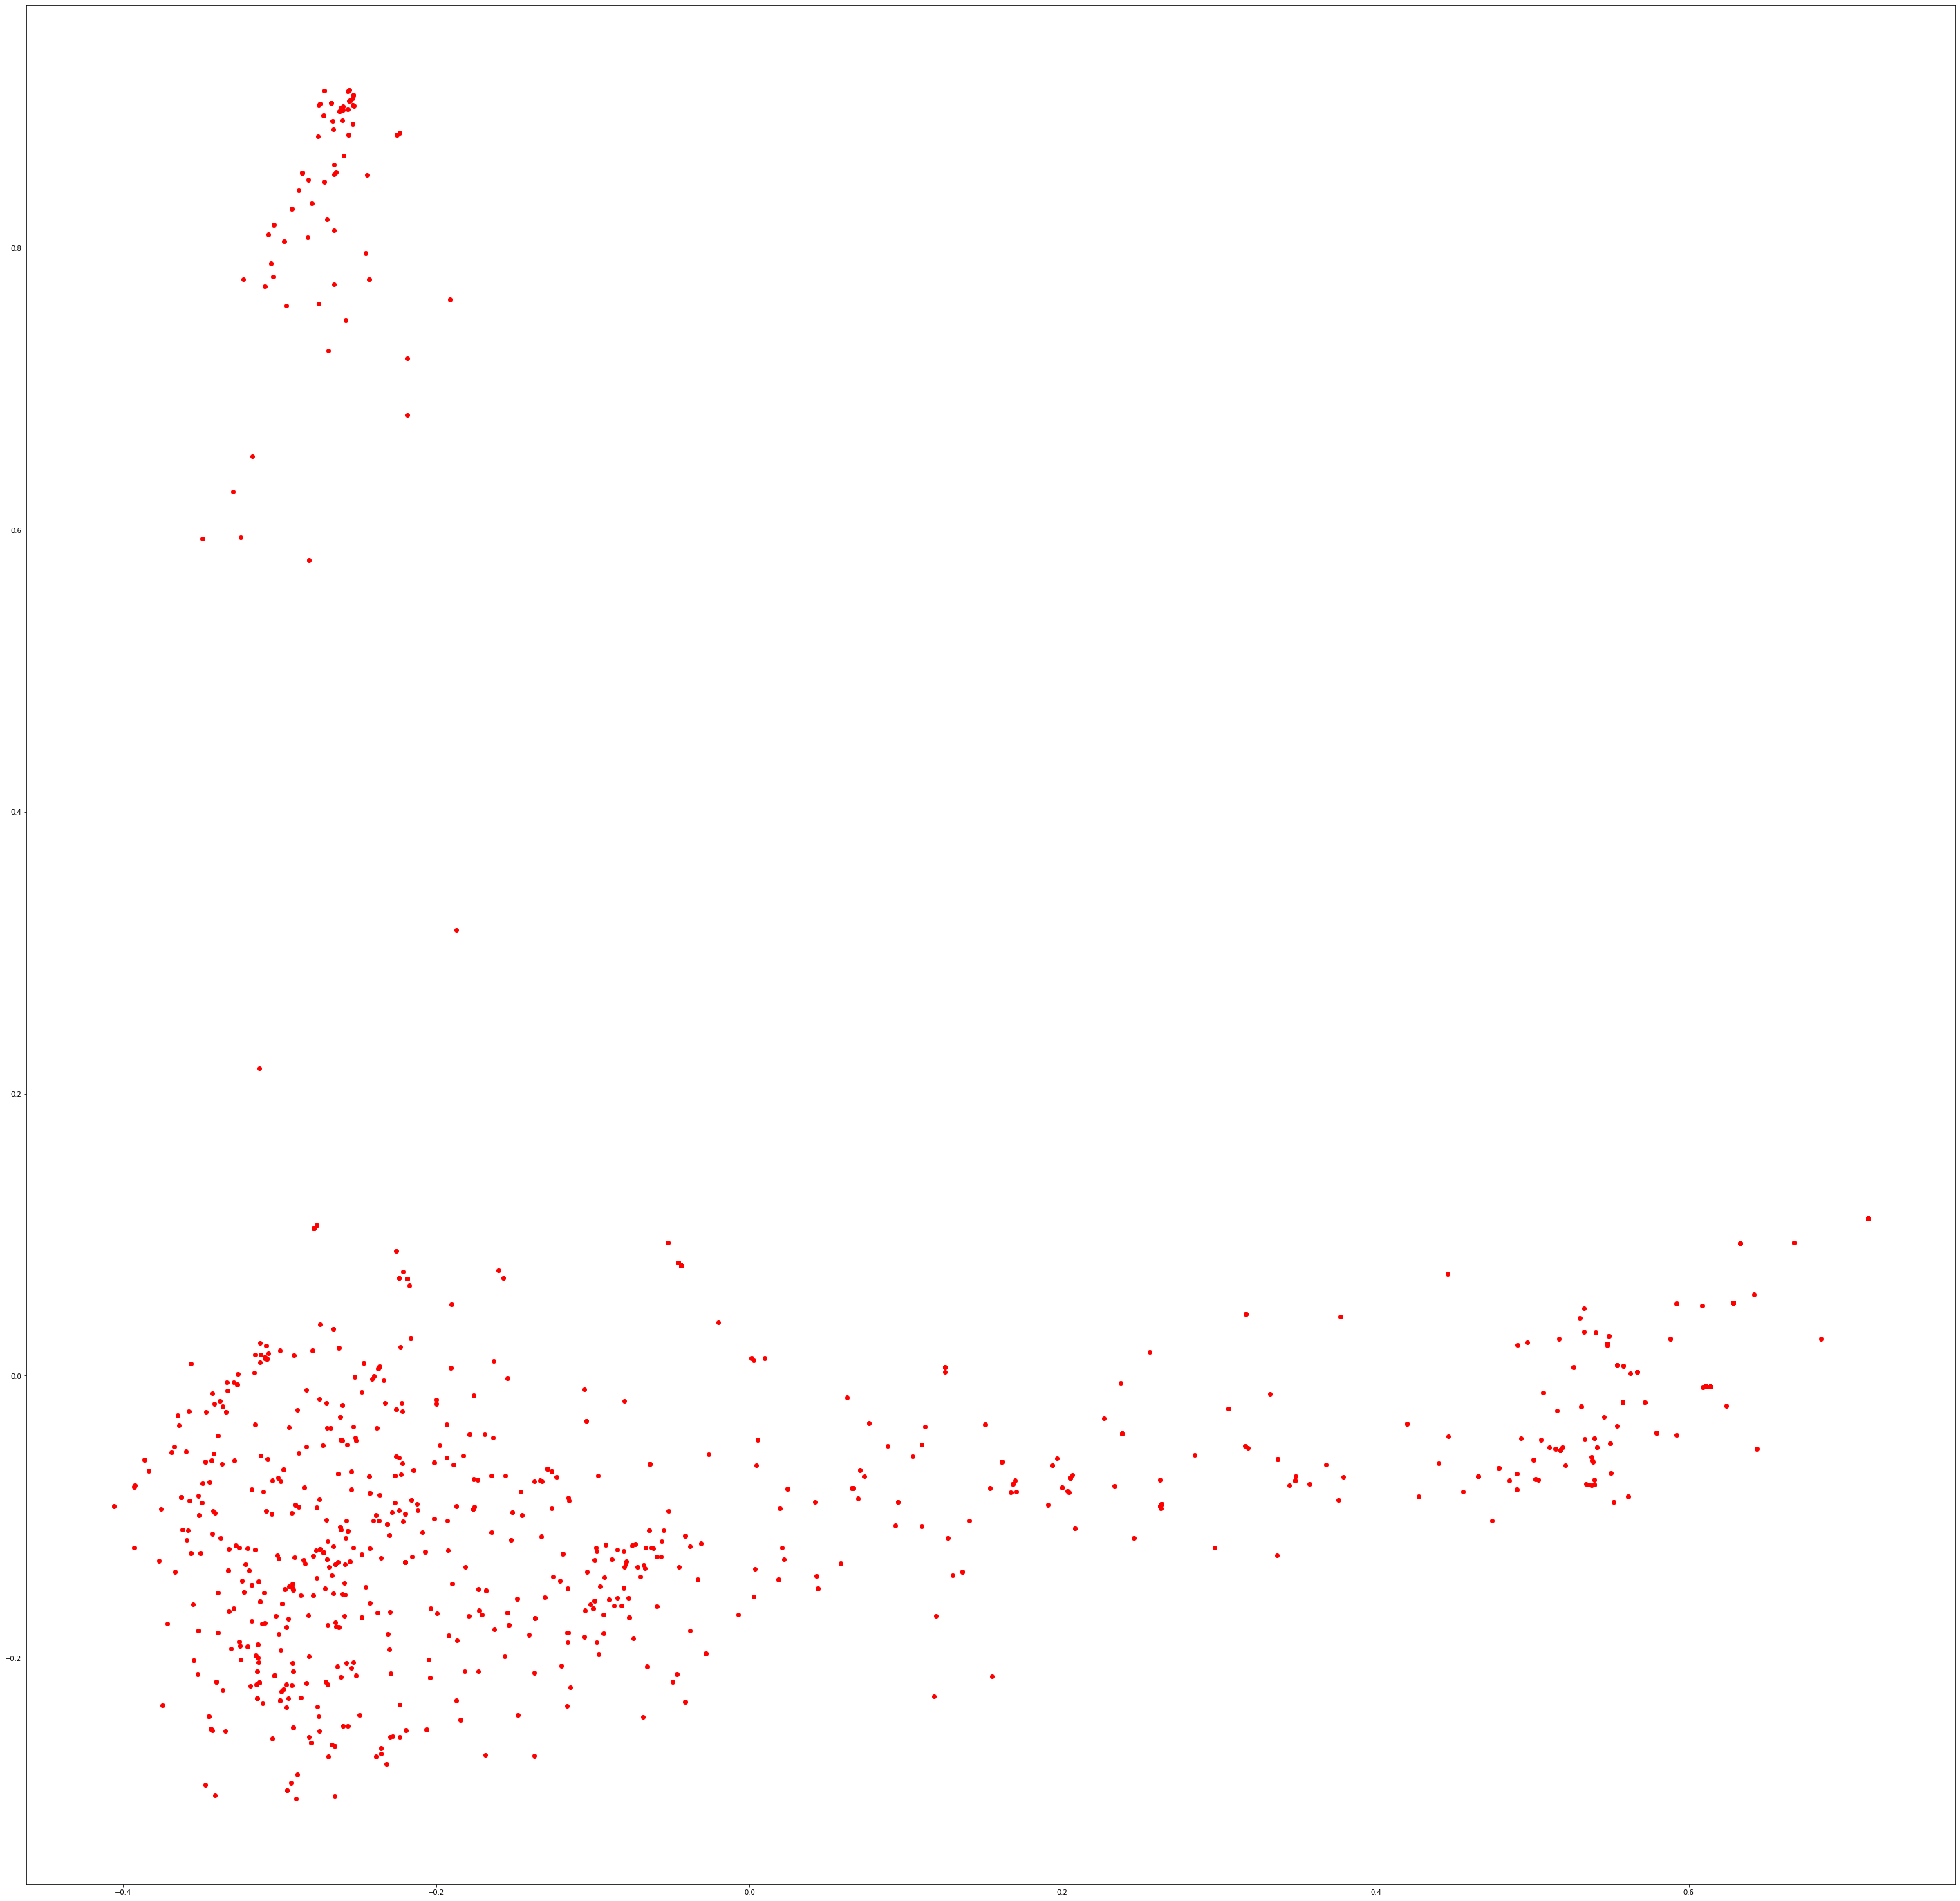

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig,ax = plt.subplots(figsize=(50,50))

ax.scatter(x_axis,y_axis, c="r")

#for i,txt in enumerate(names):
#    ax.annotate(txt[0:5], (x_axis[i], y_axis[i]))
    
plt.savefig("trc.png")    

In [36]:
kmeans_indices.shape

(976,)